## Equal-frequency (quantile) discretization 

* Definition 
  * Divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations 
  * Interval boundaries correspond to the quantiles 
* Characteristics
  * Improves value spread --> may help linear models that assume even spread 
  * Handles outliers 
  * Creates discrete variable 
  * Good to combine with categorical encoding 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import KBinsDiscretizer

# Load data

In [2]:
df = pd.read_csv('../data/house_price/train.csv', index_col='Id')

In [3]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SalePrice'),
                                                    df['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

<AxesSubplot:ylabel='Frequency'>

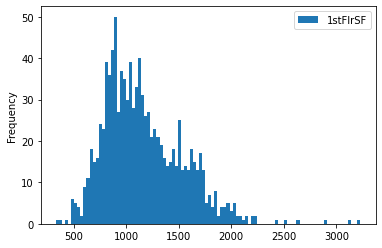

In [6]:
X_train[['1stFlrSF']].plot.hist(bins=100)

# Pandas

In [7]:
col = '1stFlrSF'
new_col = col+'_disc'
n_bins = 10 

labels = ['Q'+str(i) for i in range(1, n_bins+1)]

# find start and end of bin each observation falls into (discretized) and intervals 
discretized, intervals = pd.qcut(X_train[col], n_bins, labels=labels, retbins=True)

In [8]:
discretized

Id
65      Q5
683     Q7
961     Q3
1385    Q1
1101    Q1
        ..
764     Q7
836     Q5
1217    Q8
560     Q9
685     Q7
Name: 1stFlrSF, Length: 1022, dtype: category
Categories (10, object): [Q1 < Q2 < Q3 < Q4 ... Q7 < Q8 < Q9 < Q10]

In [9]:
intervals

array([ 334. ,  757.7,  848. ,  919.5, 1004.4, 1095. , 1187.6, 1306.7,
       1492.2, 1679.5, 3228. ])

In [10]:
# train data transform
X_train_new = X_train.copy()
X_train_new[new_col] = discretized

In [11]:
# apply to test set. now use pd.cut instead of pd.qcut as we got intervals from train data
X_test_new = X_test.copy() 
X_test_new[new_col] = pd.cut(X_test[col], bins=intervals, labels=labels)

In [12]:
X_train_new[[col, new_col]]

,1stFlrSF,1stFlrSF_disc
Id,,
65,1057,Q5
683,1291,Q7
961,858,Q3
1385,698,Q1
1101,438,Q1
...,...,...
764,1268,Q7
836,1067,Q5
1217,1318,Q8


In [13]:
X_test_new[[col, new_col]]

,1stFlrSF,1stFlrSF_disc
Id,,
530,2515,Q10
492,958,Q4
460,979,Q4
280,1156,Q6
656,525,Q1
...,...,...
272,1363,Q8
446,1689,Q10
655,2113,Q10


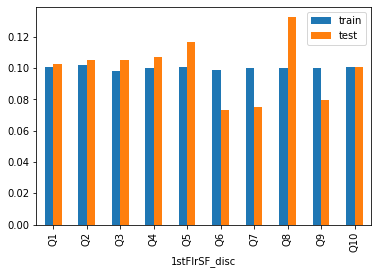

In [14]:
t1 = X_train_new.groupby(new_col)[new_col].count()/len(X_train_new)
t2 = X_test_new.groupby(new_col)[new_col].count()/len(X_test_new)

tmp = pd.concat([t1, t2], axis=1, keys=['train', 'test']).plot.bar()

# sklearn

In [15]:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# fit
disc.fit(X_train[[col]])

# new dataframe 
X_train_new = X_train.copy()
X_test_new = X_test.copy()

# transform 
X_train_new[new_col] = disc.transform(X_train[[col]])
X_test_new[new_col] = disc.transform(X_test[[col]])


In [16]:
X_train_new[[col, new_col]]

,1stFlrSF,1stFlrSF_disc
Id,,
65,1057,4.0
683,1291,6.0
961,858,2.0
1385,698,0.0
1101,438,0.0
...,...,...
764,1268,6.0
836,1067,4.0
1217,1318,7.0


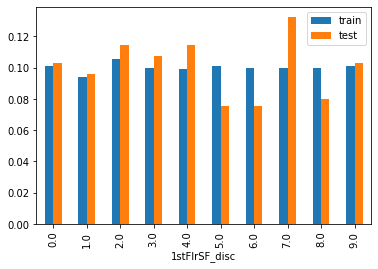

In [17]:
t1 = X_train_new.groupby(new_col)[new_col].count()/len(X_train_new)
t2 = X_test_new.groupby(new_col)[new_col].count()/len(X_test_new)

tmp = pd.concat([t1, t2], axis=1, keys=['train', 'test']).plot.bar()